In [1]:
!pip install streamlit
import numpy as np
import pandas as pd
import numpy as np
import numpy
import pandas_datareader as read
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import streamlit as st

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:

file = ('/content/sample_data/STOCK DATASET.xlsx')

data = pd.read_excel(file)

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
start = '05-02-2018'
end = '04-02-2022'
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
data = data.drop(['Date', 'Adj Close'], axis = 1)
data.head()

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1009 non-null   float64
 1   High    1009 non-null   float64
 2   Low     1009 non-null   float64
 3   Close   1009 non-null   float64
 4   Volume  1009 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.5 KB


In [9]:
data.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


In [10]:
data.shape

(1009, 5)

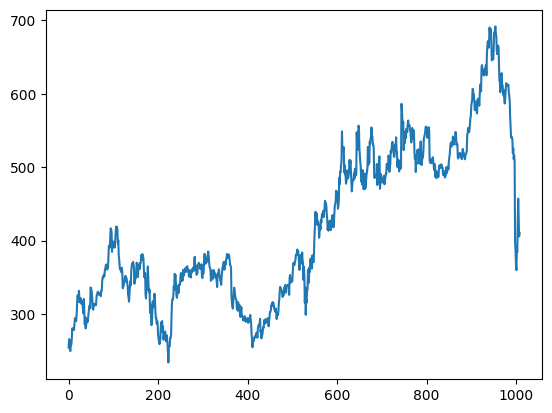

In [11]:
plt.plot(data.Close)
plt.show()

In [12]:
ma100 = data.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1004,600.807798
1005,599.403698
1006,597.711299
1007,595.874399


In [13]:
ma200 = data.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1004,560.237698
1005,559.751148
1006,559.150698
1007,558.634198


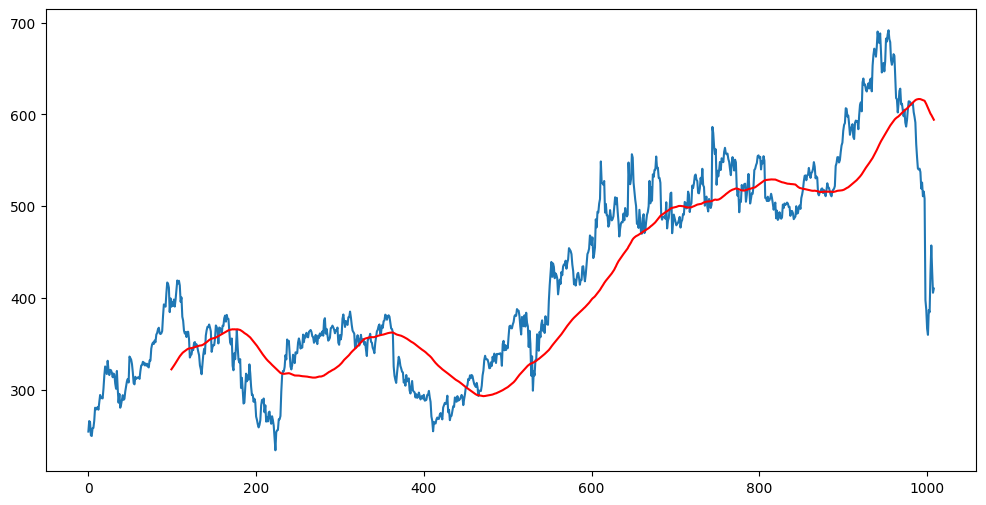

In [14]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

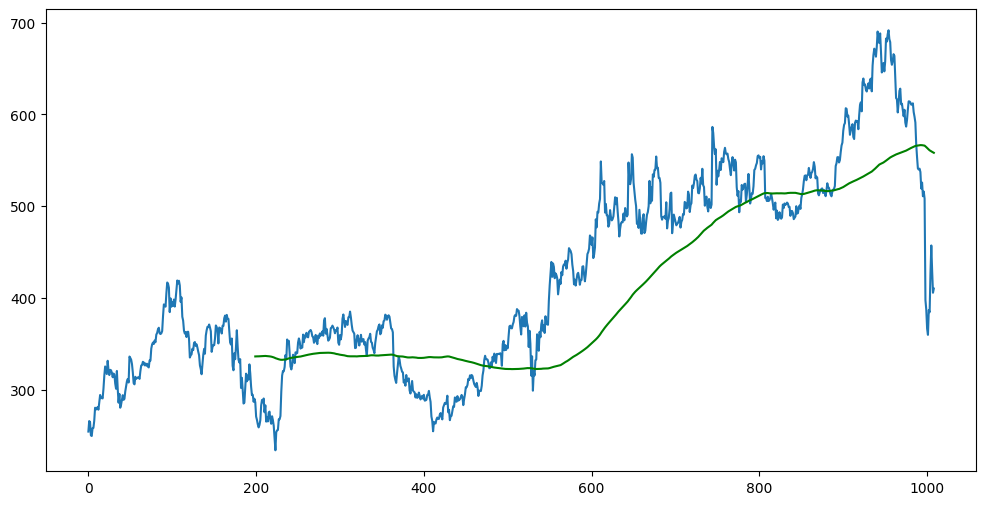

In [15]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma200,'g')

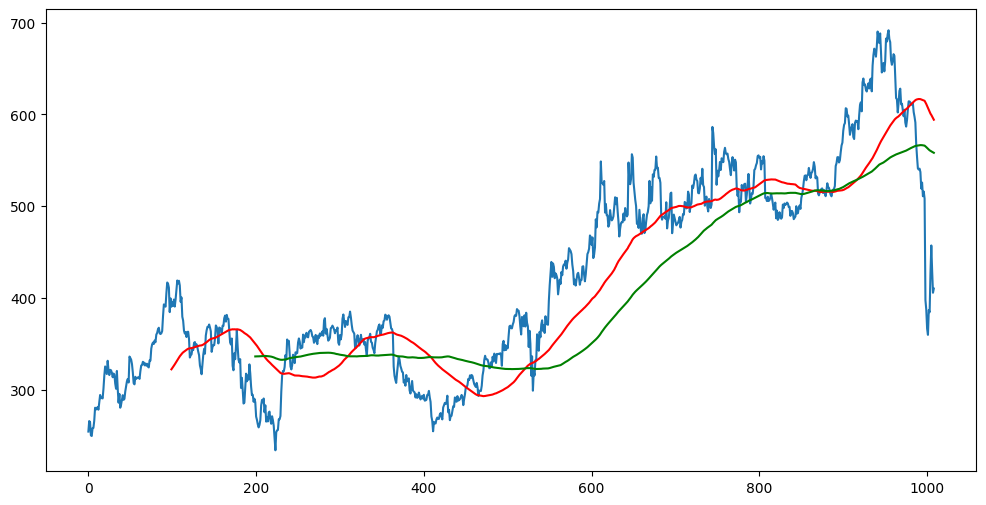

In [16]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int (len(data)*0.70): int(len(data))])
print(data_training.shape)
print(data_testing.shape)

(706, 1)
(303, 1)


In [18]:
data_training.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


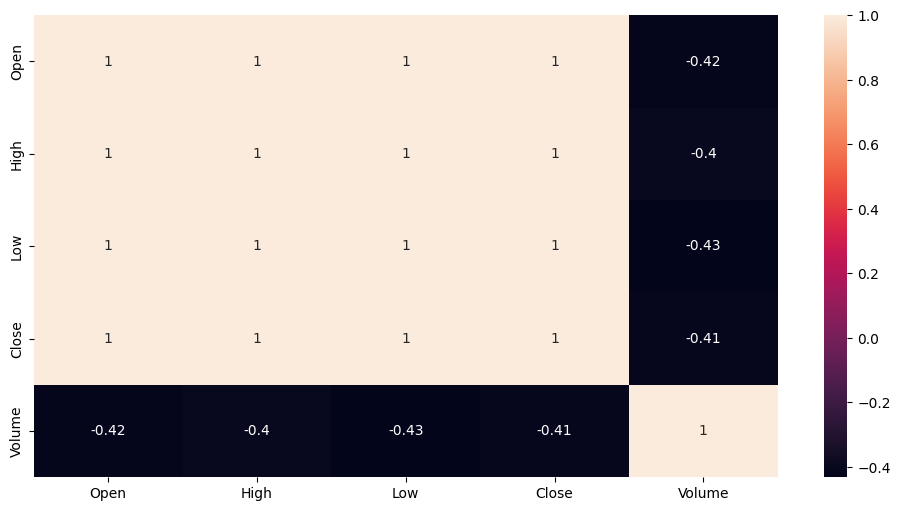

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [20]:
data_testing.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_training_array = scaler.fit_transform(data_training)

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [23]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int (len(data)*0.70): int(len(data))])
print(data_training.shape)
print(data_testing.shape)

x_train = []
y_train = []

for i in range(100,data_training.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

(706, 1)
(303, 1)


In [24]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 438ms/step - loss: 0.1254
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - loss: 0.0222
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0152
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0171
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0152
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0136
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0112
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0109
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0107
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0099
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0086
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0104
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0090
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0092
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0091
E

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [32]:
final_df.head()

,Close
0,476.890015
1,493.809998
2,493.160004
3,502.779999
4,507.760010


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [34]:
input_data.shape


(403, 1)

In [35]:
scaler.scale_

array([0.00301214])

In [36]:
df_reduced = data.drop(['Open', 'High', 'Low', 'Close'], axis=1)
print("Remaining features after dropping correlated columns:")
print(df_reduced.columns)


Remaining features after dropping correlated columns:
Index(['Volume'], dtype='object')


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features_to_scale = ['Open', 'High', 'Low', 'Close']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features_to_scale])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
data_pca = data.copy()
data_pca['PCA1'] = pca_df['PCA1']
data_pca['PCA2'] = pca_df['PCA2']
df_pca_reduced = data_pca.drop(['Open', 'High', 'Low', 'Close'], axis=1)
print("Remaining features after PCA and dropping original columns:")
print(df_pca_reduced.columns)


Remaining features after PCA and dropping original columns:
Index(['Volume', 'PCA1', 'PCA2'], dtype='object')


In [38]:
import numpy as np
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_corr_reduced = data.drop(to_drop, axis=1)
print("Remaining features after dropping highly correlated columns:")
print(df_corr_reduced.columns)


Remaining features after dropping highly correlated columns:
Index(['Open', 'Volume'], dtype='object')



Correlation matrix:
            Open      High       Low     Close    Volume
Open    1.000000  0.998605  0.998508  0.996812 -0.415838
High    0.998605  1.000000  0.998203  0.998551 -0.400699
Low     0.998508  0.998203  1.000000  0.998544 -0.432116
Close   0.996812  0.998551  0.998544  1.000000 -0.413362
Volume -0.415838 -0.400699 -0.432116 -0.413362  1.000000


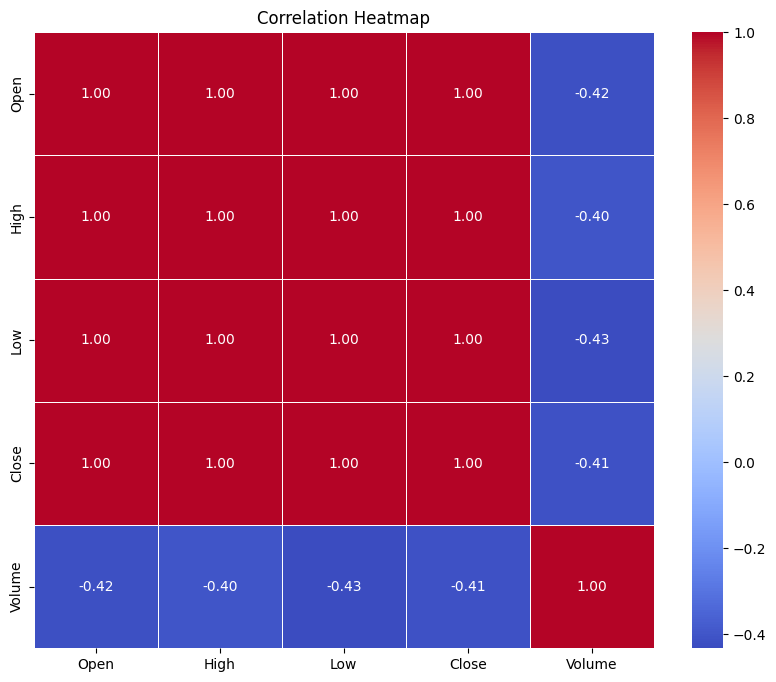


Explained variance ratio by each component:
[0.84195344 0.15708989]

Shape of the reduced data:
(1009, 2)

First few rows of the reduced data:
        PC1       PC2
0 -3.064715  0.025508
1 -3.137395  0.140056
2 -2.779851 -0.453423
3 -2.943215 -0.432654
4 -3.468747  0.868604


In [39]:
correlation_matrix = data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)
print("\nExplained variance ratio by each component:")
print(pca.explained_variance_ratio_)
print("\nShape of the reduced data:")
print(reduced_data.shape)
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])
print("\nFirst few rows of the reduced data:")
print(reduced_df.head())



PCA Component Loadings:
         Open      High       Low     Close    Volume
PC1  0.483980  0.483243  0.485103  0.483831 -0.250644
PC2  0.124767  0.143695  0.104882  0.127825  0.967701


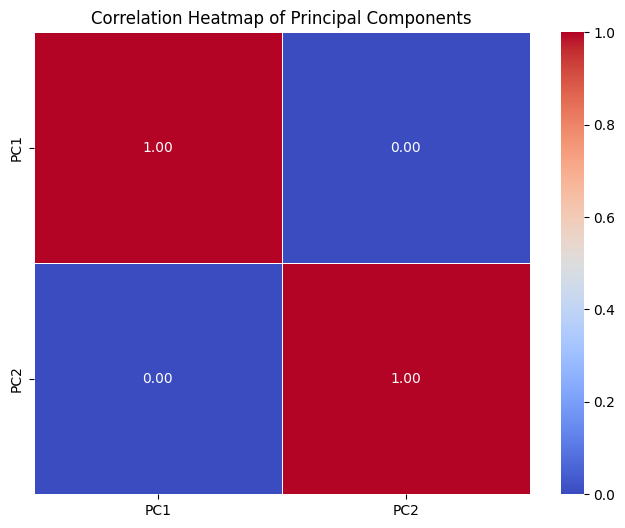

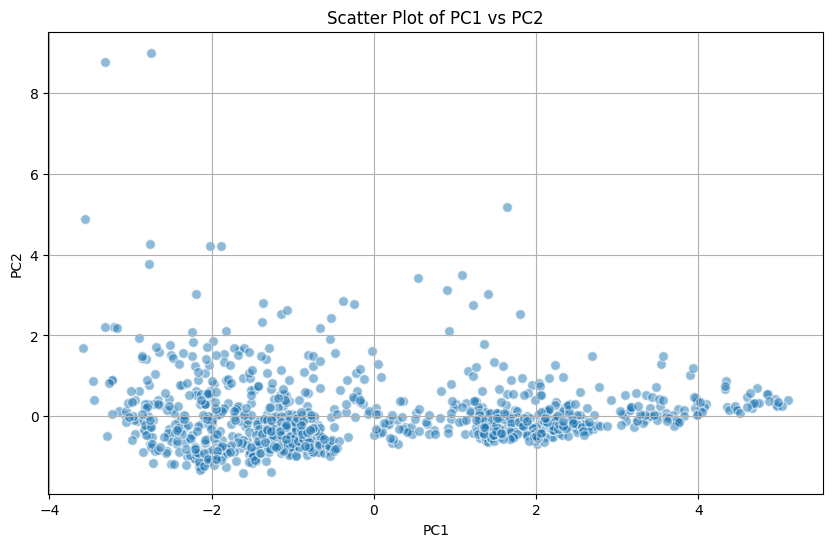

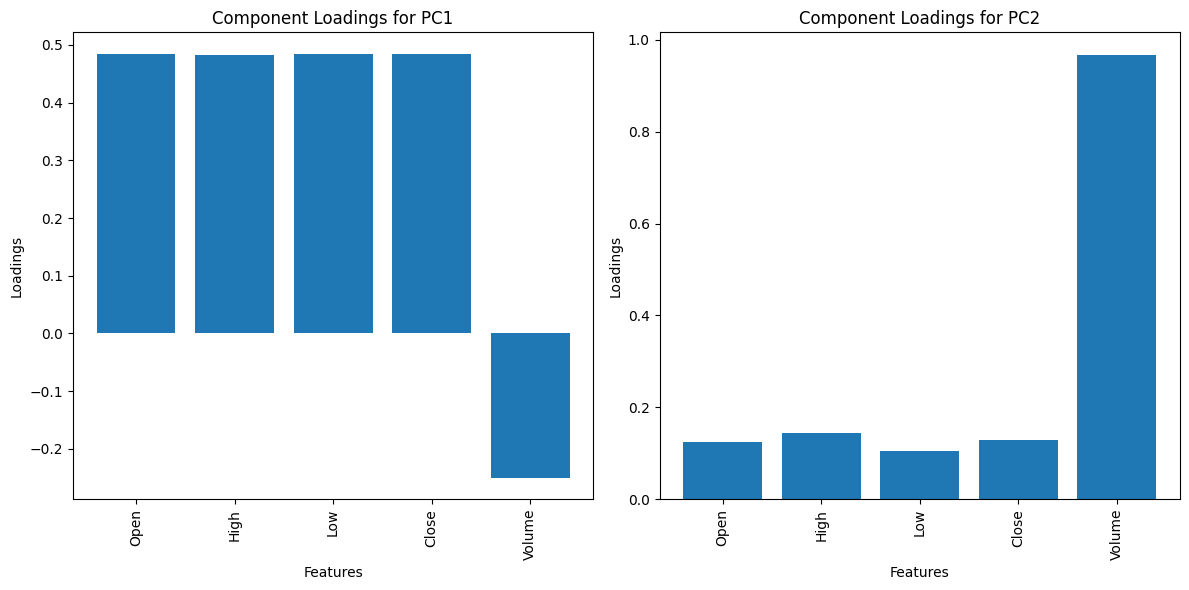


Original data (first few rows):
         Open        High         Low       Close    Volume
0  262.000000  267.899994  250.029999  254.259995  11896100
1  247.699997  266.700012  245.000000  265.720001  12595800
2  266.579987  272.450012  264.329987  264.559998   8981500
3  267.079987  267.619995  250.000000  250.100006   9306700
4  253.850006  255.800003  236.110001  249.470001  16906900

Approximated data (first few rows):
         Open        High         Low       Close        Volume
0  258.495176  263.982448  252.837453  258.860524  1.190182e+07
1  256.229609  261.944367  250.338743  256.639216  1.260688e+07
2  266.969251  271.500251  262.293047  267.152138  8.979965e+06
3  258.673080  263.204711  254.007801  258.884408  9.313440e+06
4  248.693382  255.890396  241.273312  249.366686  1.691196e+07

Original data (first few rows):
         Open        High         Low       Close    Volume
0  262.000000  267.899994  250.029999  254.259995  11896100
1  247.699997  266.700012  245.00

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])
loadings = pd.DataFrame(pca.components_, columns=data.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nPCA Component Loadings:")
print(loadings)
pca_correlation_matrix = pca_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(pca_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Principal Components')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, edgecolors='w', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(loadings.columns, loadings.loc['PC1'])
plt.title('Component Loadings for PC1')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(loadings.columns, loadings.loc['PC2'])
plt.title('Component Loadings for PC2')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
reconstructed_scaled_data = np.dot(reduced_data, pca.components_)
mean = scaler.mean_
std = scaler.scale_
approx_data = reconstructed_scaled_data * std + mean
approx_df = pd.DataFrame(approx_data, columns=data.columns)
print("\nOriginal data (first few rows):")
print(data.head())
print("\nApproximated data (first few rows):")
print(approx_df.head())
approx_df = pd.DataFrame(approx_data, columns=data.columns)
print("\nOriginal data (first few rows):")
print(data.head())
print("\nApproximated data (first few rows):")
print(approx_df.head())

In [41]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [42]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(303, 100, 1)
(303,)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(-1)
y_test = y_test.reshape(-1)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - loss: 0.1435 - val_loss: 0.0557
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0271 - val_loss: 0.0206
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0167 - val_loss: 0.0222
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0162 - val_loss: 0.0197
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0145 - val_loss: 0.0216
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0155 - val_loss: 0.0201
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0131 - val_loss: 0.0181
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0117 - val_loss: 0.0243
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0134 - val_loss: 0.0161
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0111 - val_loss: 0.0163
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0112 - val_loss: 0.0155
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0118 - val

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_train_pred = y_train_pred.reshape(-1)
y_test_pred = y_test_pred.reshape(-1)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
n_test = len(y_test)
p = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p - 1))
epsilon = 1e-10
accuracy = 100 - np.mean(np.abs((y_test_pred - y_test) / (y_test + epsilon))) * 100
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R²: {r2_train:.2f}")
print(f"Test R²: {r2_test:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Train MSE: 0.00
Test MSE: 0.01
Test RMSE: 0.09
Test MAE: 0.06
Train R²: 0.93
Test R²: 0.75
Adjusted R²: 0.63
Model Accuracy: -1571163409.97%


In [45]:
!pip install ipywidgets gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import gradio as gr
import ipywidgets as widgets
from IPython.display import display

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = pd.DataFrame(np.random.rand(1000, 10), columns=[f"Feature {i+1}" for i in range(10)])

def predict_random_data():
    random_indices = np.random.choice(data.index, size=100, replace=False)
    random_samples = data.loc[random_indices].values
    random_samples = random_samples.reshape(-1, data.shape[1], 1)
    random_samples_scaled = scaler.fit_transform(random_samples.reshape(-1, random_samples.shape[2])).reshape(random_samples.shape)
    predictions = model.predict(random_samples_scaled)
    results = pd.DataFrame(predictions.flatten(), columns=['Predicted Value'])
    return results
def gradio_interface():
    with gr.Blocks() as demo:
        gr.Markdown("### Predictions for 100 Random Samples")
        with gr.Row():
            results = gr.Dataframe()
        button = gr.Button("Generate Predictions")
        button.click(fn=predict_random_data, outputs=results)

    return demo
demo = gradio_interface()
demo.launch()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://92acb6c32fa0d167cc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
